In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Si una de las principales variables es "categórica" ​​(dividida en grupos discretos), puede ser útil utilizar un enfoque más especializado para la visualización. Hay una serie de funciones a nivel de ejes para trazar datos categóricos de diferentes maneras y una interfaz a nivel de figura, donde **catplot(), brinda un acceso unificado de nivel superior a ellos**.

Es útil pensar en los diferentes tipos de tramas categóricas como pertenecientes a **tres familias diferentes**.

### Todos los graficos se hacen con la funcion catplot()

#### 1. Diagramas de dispersión categóricos:
    * stripplot() (with kind="strip"; the default)
    * swarmplot() (with kind="swarm")

#### 2. Gráficos para distribución categórica:
    * boxplot() (with kind="box")
    * violinplot() (with kind="violin")
    * boxenplot() (with kind="boxen")
    
#### 3. Gráficos de estimación de la tendencia central en categorias:
    * pointplot() (with kind="point")
    * barplot() (with kind="bar")
    * countplot() (with kind="count")

## 1. Diagramas de dispersión categóricos

La representación predeterminada de los datos en **catplot()** usa un diagrama de dispersión. En realidad, hay dos diagramas de dispersión categóricos diferentes en seaborn. Toman diferentes enfoques para resolver el principal desafío de **representar datos categóricos con un gráfico de dispersión, que es que todos los puntos pertenecientes a una categoría caerían en la misma posición a lo largo del eje correspondiente a la variable categórica**.

### 1.1 stripplot()


El enfoque utilizado por stripplot(), que **es el "tipo" predeterminado en catplot()**, es ajustar las posiciones de los puntos en el eje categórico con una pequeña cantidad de "inestabilidad" aleatoria

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


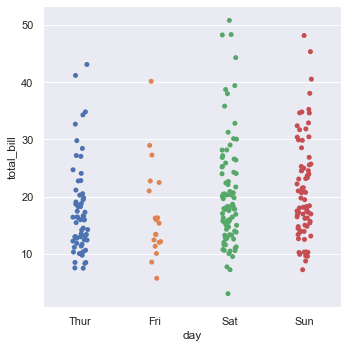

In [7]:
sns.catplot(data=tips, x='day', y='total_bill');

### 1.1  Desactivar el parametro "jitter"

Podemos utlizar **"jitter=False"** para eliminar la distorsion, y ver los datos de forma mas lineal

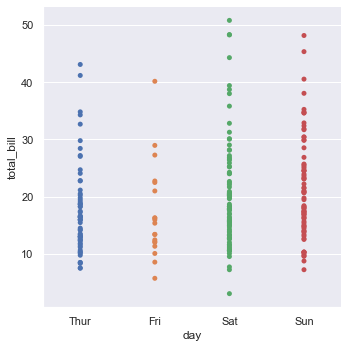

In [9]:
sns.catplot(data=tips, x='day', y ='total_bill', jitter=False);

### 1.2 swarmplot() - kind='swarm'

El segundo enfoque ajusta **los puntos a lo largo del eje categórico mediante un algoritmo que evita que se superpongan**. Puede brindar una mejor representación de la distribución de las observaciones, **aunque solo funciona bien para conjuntos de datos relativamente pequeños**. Este tipo de gráfico a veces se denomina "enjambre de abejas" y se dibuja en seaborn mediante swarmplot(), que **se activa configurando kind="swarm" en catplot()**

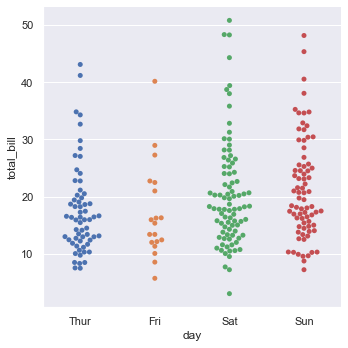

In [30]:
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm');

### 1.3 Agregar otra dimension categorica con el argumento "hue"

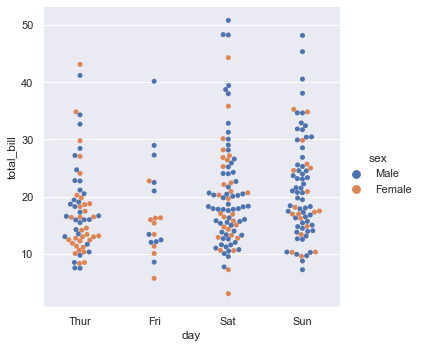

In [31]:
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='sex');

### 1.4 Seleccionar categorias de los datos que existan en el dataset con el parametro "order"

La otra opción para elegir un orden predeterminado es tomar los niveles de la categoría tal como aparecen en el conjunto de datos. El orden también se puede controlar en función de la parcela específica mediante **el parámetro de "order"**. Esto puede ser importante cuando se dibujan múltiples gráficos categóricos en la misma figura.

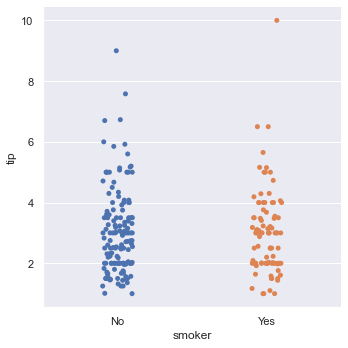

In [32]:
sns.catplot(data=tips, x='smoker', y='tip', order=['No', 'Yes']);

### 1.5 Cambiar el orden de los ejes

En algunos casos puede ser util cambiar el orden de los ejes, para visualizar mejor, los patrones en los datos.

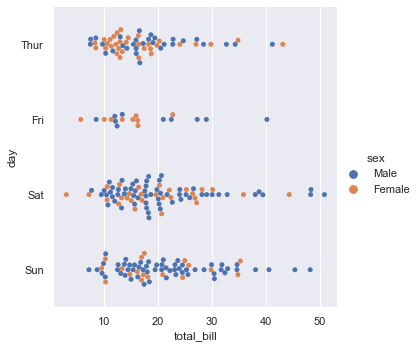

In [33]:
sns.catplot(data=tips, x='total_bill', y='day', kind='swarm', hue='sex');

## 2. Comparar distribuciones

A medida que crece el tamaño del conjunto de datos, los diagramas de dispersión categóricos se vuelven limitados en la información que pueden proporcionar sobre la distribución de valores dentro de cada categoría. Cuando esto sucede, existen varios enfoques para resumir la información de distribución de manera que faciliten las comparaciones entre los niveles de categoría.

### 2.1 Boxplots - kind="box"

Este tipo de gráfico muestra los valores de los tres cuartiles de la distribución junto con los valores extremos. Los "bigotes" se extienden a puntos que se encuentran dentro de 1,5 IQR del cuartil inferior y superior, y luego las observaciones que quedan fuera de este rango se muestran de forma independiente. Esto significa que cada valor en el diagrama de caja corresponde a una observación real en los datos.

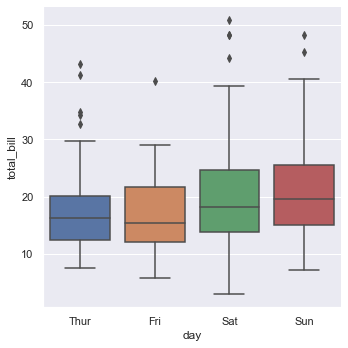

In [35]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

### 2.1.2 Boxplots paralelos agregando un "hue"

Si agregamos un variable categorica con "hue", se crean automaticamente boxplots, para cada condicion.

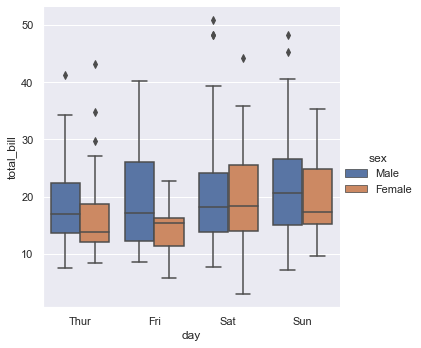

In [37]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box', hue='sex');

### 2.1.3 Graficos individuales con "dodge=False"

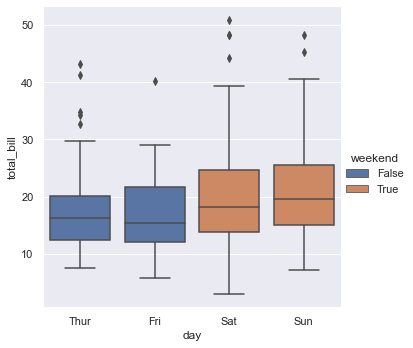

In [38]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
)

### 2.1.4 boxenplot() - kind="boxen"

Este estilo de gráfico se denominó originalmente gráfico de "valor de letra" porque muestra una gran cantidad de cuantiles que se definen como "valores de letra". Es similar a un diagrama de caja al trazar una representación no paramétrica de una distribución en la que todas las características corresponden a observaciones reales. **Al graficar más cuantiles, proporciona más información sobre la forma de la distribución** 

diamonds = sns.load_dataset('diamonds')
diamonds.head()

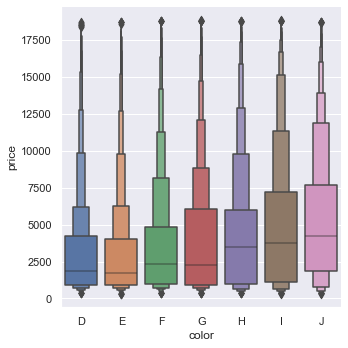

In [40]:
sns.catplot(data=diamonds.sort_values("color"), 
           x='color', y='price', kind='boxen')

### 2.2 Violinplots - kind='violin'

Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse. A diferencia de un diagrama de caja, en el que todos los componentes del diagrama corresponden a puntos de datos reales, **el diagrama de violín presenta una kernel density estimation de la distribución subyacente**.

Esta puede ser una forma eficaz y atractiva de mostrar múltiples distribuciones de datos a la vez, pero tenga en cuenta que **el procedimiento de estimación está influenciado por el tamaño de la muestra, y los violines para muestras relativamente pequeñas pueden parecer engañosamente fluidos**.

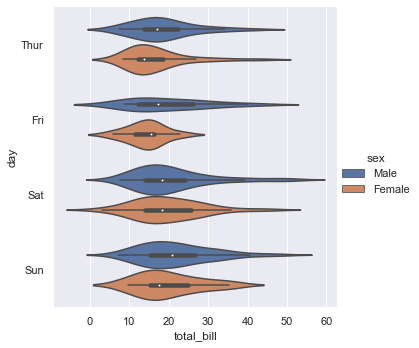

In [42]:
sns.catplot(data=tips, 
           x='total_bill', y='day', hue='sex', kind='violin')

### 2.2.1 Dividir el violin plot con el parametro split=True

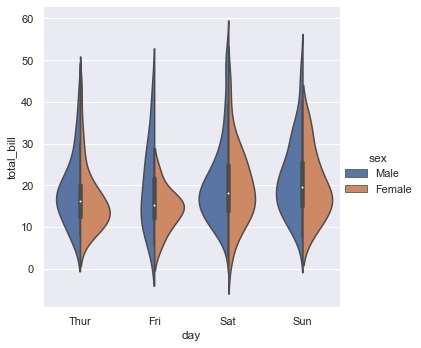

In [45]:
sns.catplot(data=tips, 
           y='total_bill', x='day', hue='sex', kind='violin',
           split=True)

Hay varias opciones para la gráfica que se dibuja en el interior de los violines, incluidas formas de mostrar cada observación individual en lugar de los valores de la gráfica de caja de resumen.

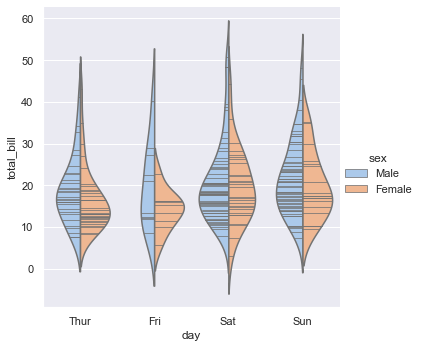

In [47]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
);

### 2.2.2 Combinar el violin plot con swarmplot() or stripplot() 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

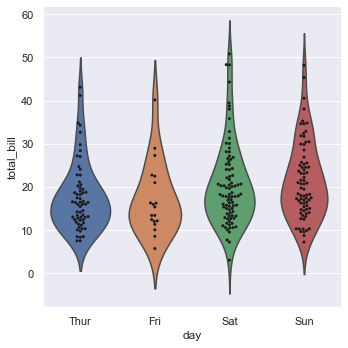

In [51]:
# Creamos una variable con un violinplot
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)

# Luego creamos un swarmplot y agregamos la variable, anterior como un "ax" --> "ax=g.ax"
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)
#sns. stripplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

## 3. Estimacion de la tendencia central en categorias

Para otras aplicaciones, en lugar de mostrar la distribución dentro de cada categoría, es posible que desee mostrar una estimación de la tendencia central de los valores.

### 3.1 Bar plots - barplot() o kind='bar'

**La función barplot() opera en un conjunto de datos completo y aplica una función para obtener la estimación (tomando la media por defecto)**. Cuando hay varias observaciones en cada categoría, también utiliza el arranque para calcular un intervalo de confianza alrededor de la estimación, que se representa mediante barras de error.

**Barra de error**: Las barras de error ayudan a indicar el error estimado o la incertidumbre para dar una idea general de cuán precisa es una medición. Esto se hace mediante el uso de marcadores dibujados sobre el gráfico original y sus puntos de datos.

**Una barra de error corta** muestra que los valores están concentrados, indicando que el valor promedio trazado es más probable, mientras que **una barra de error larga** indicaría que los valores están más dispersos y son menos confiables. También dependiendo del tipo de datos, la longitud de cada par de barras de error tiende a ser de igual longitud en ambos lados. Sin embargo, si los datos están sesgados, entonces las longitudes de cada lado estarían desequilibradas.

In [52]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


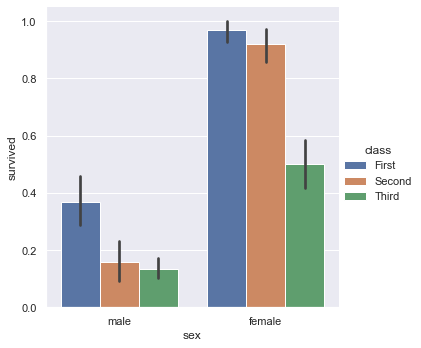

In [54]:
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='bar');

### 3.1.1 Cambiar el tipo de error de la barra

Nombre del método de la barra de errores (ya sea “ci”, “pi”, “se” o “sd”), o una tupla con un nombre de método y un parámetro de nivel, o una función que mapea de un vector a un (mín, máx. ) intervalo, o Ninguno para ocultar la barra de error.

In [59]:
# sns.catplot(data=titanic, x="age", y="deck",  kind="bar", errorbar=("pi", 95))

### 3.2 Conteo de observaciones con countplot() o kind="count"

Un caso especial para el gráfico de barras es cuando desea mostrar el número de observaciones en cada categoría en lugar de calcular una estadística para una segunda variable. Esto es similar a un histograma sobre una variable categórica, en lugar de cuantitativa. En seaborn, es fácil hacerlo con la función countplot().

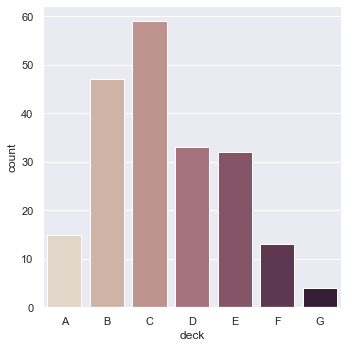

In [61]:
sns.catplot(data=titanic, x='deck', kind='count', palette="ch:.25")

Podemos hacer el mismo grafico con orientacion horizontal

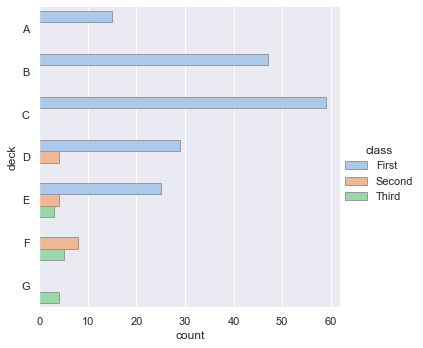

In [62]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

### 3.3 Point plots pointplot() o kind="point"

La función pointplot() ofrece un estilo alternativo para visualizar la misma información. Esta función también codifica el valor de la estimación con la altura en el otro eje, pero en lugar de mostrar una barra completa, traza la estimación puntual y el intervalo de confianza. **Además, pointplot() conecta puntos de la misma categoría de tono. Esto hace que sea fácil ver cómo cambia la relación principal en función de la semántica del matiz, porque sus ojos son bastante buenos para captar las diferencias de pendientes**

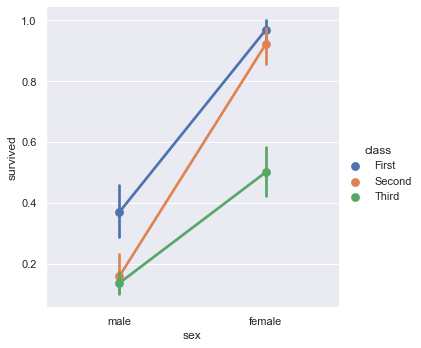

In [66]:
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='point');

Si bien las funciones categóricas carecen del estilo semántico de las funciones relacionales, aún puede ser una buena idea variar el marcador y/o el estilo de línea junto con el tono para crear figuras que sean lo más accesibles posible y se reproduzcan bien en blanco y negro.

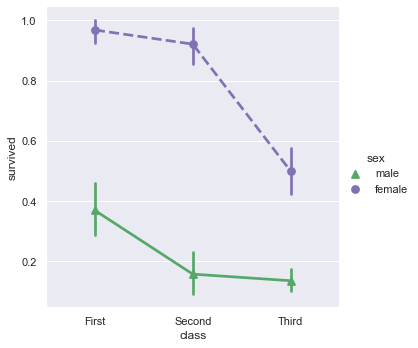

In [67]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### 4. Mostrar propiedades adicionales - Atributo "col"

Podemos utilizar el atributo "col" para agregar dimensiones adicionales a nuestro grafico. Por ejemplo, podriamos agregar una tercera categoria, que genera un par de grafico, y podamos compararlos facilmente.

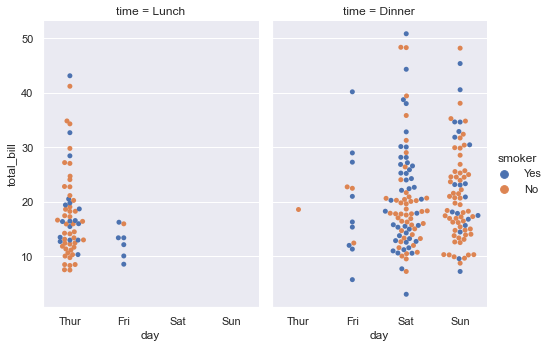

In [68]:
# En este caso, vamos a dividir los datos, por la columna "time"
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

Para una personalizacion mas avanzada puede utilizar metodos de **FacetGrid** 

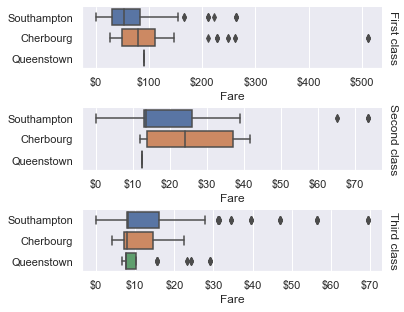

In [69]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')